ONLY FOR EDUCATIONAL PURPOSES, DO NOT USE FOR PERSONAL PURPOSES- ALGORITHM MIGHT NOT GIVE ACCURATE PREDICTIONS

In [47]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [48]:
stocks = input("Enter Stock Code: ")
data = yf.download(stocks, "2008-01-01", "2025-12-17")
data.head()

C:\Users\karti\AppData\Local\Temp\ipykernel_9308\3272045065.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, "2008-01-01", "2025-12-17")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NG=F,NG=F,NG=F,NG=F,NG=F
Date,,,,,
2008-01-02,7.850,7.876,7.564,7.572,68553
2008-01-03,7.674,7.980,7.610,7.873,72742
2008-01-04,7.841,7.859,7.500,7.652,61496
2008-01-07,7.879,7.940,7.701,7.803,56675
2008-01-08,7.967,7.997,7.880,7.909,53775


In [49]:
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4520 entries, 2008-01-02 to 2025-12-16
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NG=F)   4520 non-null   float64
 1   (High, NG=F)    4520 non-null   float64
 2   (Low, NG=F)     4520 non-null   float64
 3   (Open, NG=F)    4520 non-null   float64
 4   (Volume, NG=F)  4520 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 211.9 KB


Price,Close,High,Low,Open,Volume
Ticker,NG=F,NG=F,NG=F,NG=F,NG=F
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000
mean,3.731844,3.825282,3.647638,3.738495,134475.303761
std,1.803722,1.854732,1.757609,1.807946,55580.385237
min,1.482000,1.567000,1.432000,1.441000,0.000000
25%,2.669750,2.724000,2.621000,2.672750,95001.750000
50%,3.236000,3.310000,3.166000,3.241000,130357.000000
75%,4.198000,4.292000,4.106500,4.196750,165300.500000
max,13.577000,13.694000,13.306000,13.580000,459196.000000


DATA ANALYSIS

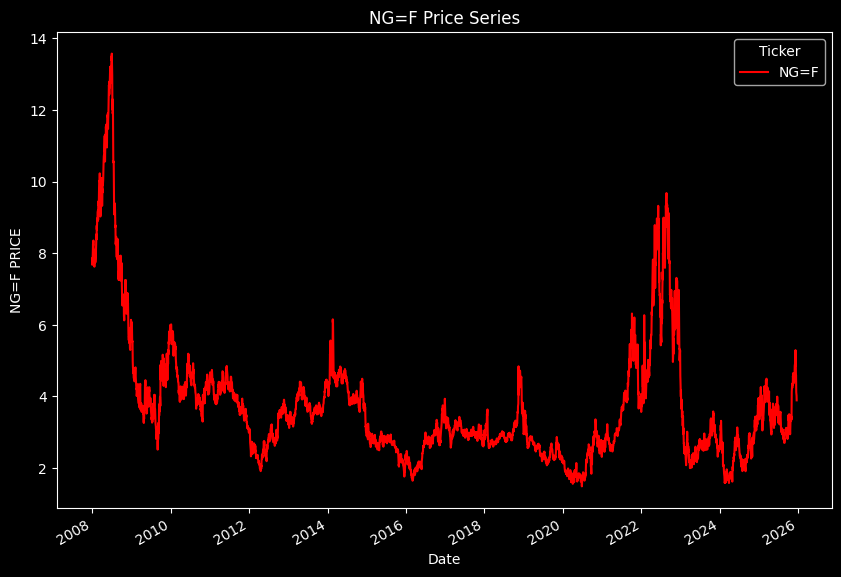

In [50]:
data.Close.plot(figsize=(10,7),color='r')


plt.ylabel("{} PRICE".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

C:\Users\karti\AppData\Local\Temp\ipykernel_9308\3218051027.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"])


<Axes: ylabel='Density'>

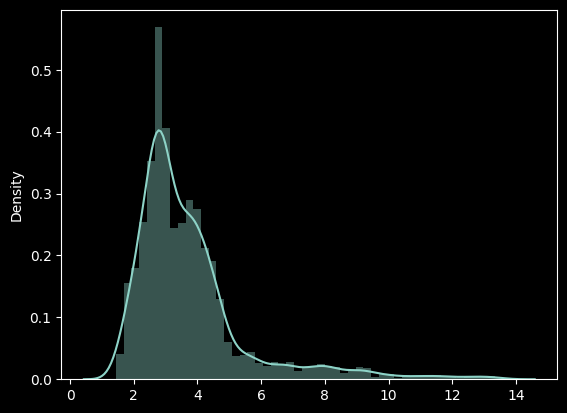

In [51]:
sns.distplot(data["Open"])

C:\Users\karti\AppData\Local\Temp\ipykernel_9308\2693321050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<Axes: ylabel='Density'>

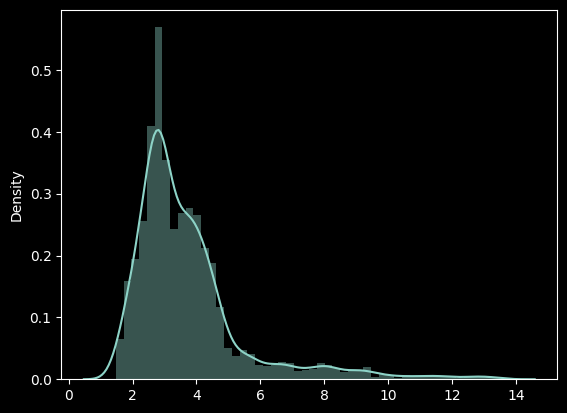

In [52]:
sns.distplot(data["Close"])

C:\Users\karti\AppData\Local\Temp\ipykernel_9308\3277148864.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["High"])


<Axes: ylabel='Density'>

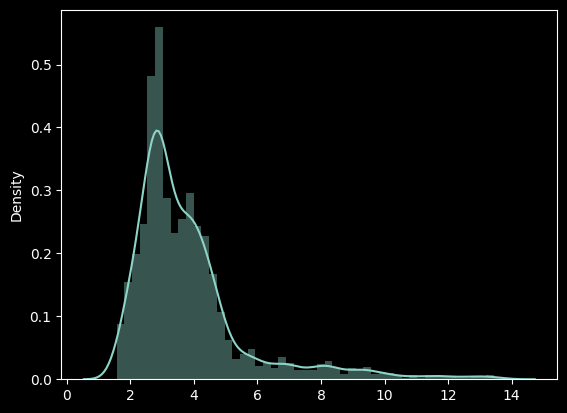

In [53]:
sns.distplot(data["High"])

C:\Users\karti\AppData\Local\Temp\ipykernel_9308\1748125048.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Low"])


<Axes: ylabel='Density'>

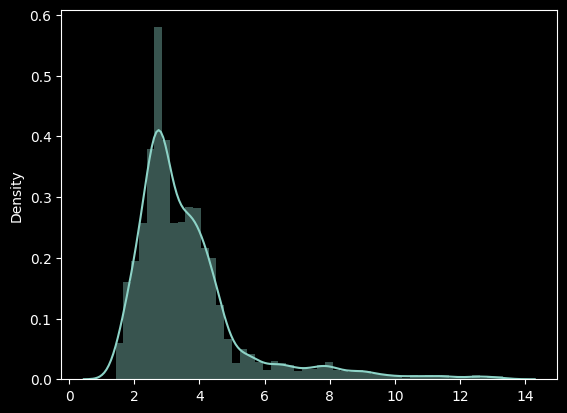

In [54]:
sns.distplot(data["Low"])

C:\Users\karti\AppData\Local\Temp\ipykernel_9308\1277132606.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Volume"])


<Axes: ylabel='Density'>

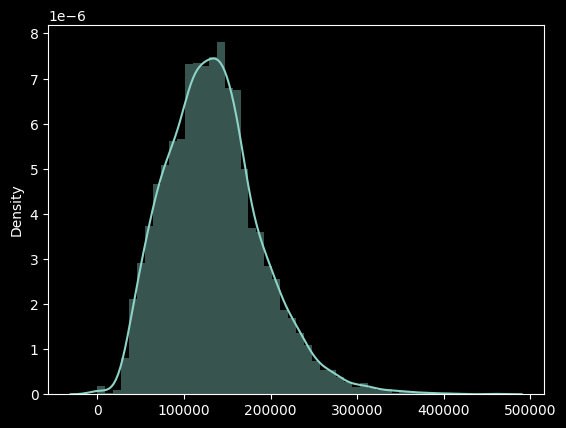

In [55]:
sns.distplot(data["Volume"])

Conclusions:
- Shape of data
- Data Distribution
- Non Linearly Distributed
- Data is multi-collinear, hence linear regression is not usable, so we have to perform PCA(Principal Component Analysis to remove multi collinearity)
- In this case Linear Regression can be used
- We will use SVMs regularised linear regression works best in this case

Learning Model

In [56]:
X = data.drop("Close", axis = 1)
y = data["Close"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3616, 4)
(904, 4)
(3616, 1)
(904, 1)


In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
pred1 = lr.predict(X_test)
pred1

array([[ 1.71274937],
       [10.28841972],
       [ 2.31305481],
       [ 3.15083443],
       [12.07621765],
       [ 2.21699999],
       [ 2.46031539],
       [ 2.50452763],
       [ 3.0711466 ],
       [ 1.99414121],
       [ 4.36165101],
       [ 2.90318133],
       [ 8.34304786],
       [ 3.58721224],
       [ 2.3621474 ],
       [ 3.83654756],
       [ 1.79751595],
       [ 4.18398234],
       [ 3.13998239],
       [ 4.41893253],
       [ 3.03301248],
       [ 4.01544553],
       [ 5.52219819],
       [ 1.87055847],
       [ 4.57046398],
       [ 1.74682955],
       [ 2.10893379],
       [ 4.35037113],
       [ 4.55088206],
       [ 2.83227928],
       [ 3.89474973],
       [ 1.65352521],
       [ 3.44716043],
       [ 6.22995311],
       [ 2.19882073],
       [ 2.65748577],
       [ 2.14938533],
       [ 2.92565989],
       [ 3.80191569],
       [ 3.56095115],
       [ 2.47092023],
       [ 4.8451128 ],
       [ 9.43693556],
       [ 7.87647047],
       [ 4.10936612],
       [ 5

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
def calc_metrics(y_test,y_pred):
    #y_test is true value, y_pred is model predict value
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2_scores = r2_score(y_test,y_pred)
    print("MSE: ", mse)
    print("RMSE: ",rmse)
    print("R2_SCORES: ",r2_scores)

calc_metrics(y_test,pred1)

MSE:  0.0025836197077668704
RMSE:  0.050829319371469756
R2_SCORES:  0.9991623935459444


In [59]:
from sklearn.linear_model import Lasso, Ridge
la = Lasso().fit(X_train,y_train)
ri = Ridge().fit(X_train,y_train)
lap = la.predict(X_test)
rip = ri.predict(X_test)

In [60]:
calc_metrics(y_test,lap)
calc_metrics(y_test,rip)

MSE:  0.30008450893891164
RMSE:  0.5477996978265977
R2_SCORES:  0.9027129570603152
MSE:  0.0026038206984616698
RMSE:  0.05102764641311286
R2_SCORES:  0.9991558444086494


- Lasso is Not very good in terms of R2_SCORES, but is less prone to over-fitting.
-  Ridge is Similar to Linear Regression in R2_Scores and is less prone to over-fitting.
- We'll use Ridge not Lasso for this case

In [61]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR()
params = {'C':[0.1,10,100,1000],
          'gamma': [1,0.1,0.001,0.0001],
          'kernel': ['rbf']}
grid = GridSearchCV(SVR(),params,refit = True, verbose=3)

grid.fit(X_train,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.080 total time=   0.6s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.074 total time=   0.5s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.059 total time=   0.5s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.071 total time=   0.5s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.108 total time=   0.5s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.079 total time=   0.6s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.073 total time=   0.5s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.058 total time=   0.5s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   0.5s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.107 total time=   0.5s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.067 total time=   0.5s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.063 total time=   0.4s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.053 total time=   0.5s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.066 total time=   0.5s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.095 total time=   0.4s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.045 total time=   0.5s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.053 total time=   0.5s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.044 total time=   0.5s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.049 total time=   0.5s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.089 total time=   0.4s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.002 total time=   1.4s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.001 total time=   0.6s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.001 total time=   0.6s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.003 total time=   0.6s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.001 total time=   0.7s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.009 total time=   0.7s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.007 total time=   0.6s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.007 total time=   0.6s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.009 total time=   0.7s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.003 total time=   0.7s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.176 total time=   0.8s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.041 total time=   0.8s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.195 total time=   0.7s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.221 total time=   0.7s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.013 total time=   0.7s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.326 total time=   0.8s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.280 total time=   0.8s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.427 total time=   0.8s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.289 total time=   1.8s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.138 total time=   2.3s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.002 total time=   1.8s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.001 total time=   1.8s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.001 total time=   1.9s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.003 total time=   1.9s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=100, gamma=1, kernel=rbf;, score=-0.001 total time=   2.0s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.009 total time=   2.6s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.007 total time=   1.9s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.007 total time=   1.9s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.009 total time=   2.0s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.003 total time=   1.9s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.222 total time=   3.4s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.083 total time=   3.2s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.197 total time=   3.5s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.252 total time=   3.9s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.019 total time=   3.4s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=100, gamma=0.0001, kernel=rbf;, score=-0.823 total time=   6.0s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=100, gamma=0.0001, kernel=rbf;, score=-0.554 total time=   6.0s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=100, gamma=0.0001, kernel=rbf;, score=-0.942 total time=   7.0s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=100, gamma=0.0001, kernel=rbf;, score=-0.688 total time=   3.5s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=100, gamma=0.0001, kernel=rbf;, score=-0.336 total time=   6.1s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.002 total time=   0.6s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.7s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.6s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.003 total time=   0.7s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.001 total time=   0.7s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.009 total time=   0.7s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.007 total time=   1.1s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.007 total time=   1.8s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.009 total time=   1.8s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.003 total time=   1.7s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.230 total time=   3.2s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.081 total time=   2.9s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.196 total time=   2.9s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.252 total time=   2.9s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.019 total time=   2.7s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=1000, gamma=0.0001, kernel=rbf;, score=-1.024 total time=  21.6s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=1000, gamma=0.0001, kernel=rbf;, score=-0.542 total time=  13.1s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=1000, gamma=0.0001, kernel=rbf;, score=-0.841 total time=  14.2s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=1000, gamma=0.0001, kernel=rbf;, score=-0.829 total time=  14.7s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .C=1000, gamma=0.0001, kernel=rbf;, score=-0.314 total time=  18.8s


c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",SVR()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.1, 10, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and 

In [65]:
svr = SVR(C = 10, gamma = 0.1, kernel = 'rbf')
svr.fit(X_train,y_train)
svr_pred = svr.predict(X_test)

c:\Users\karti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import joblib
joblib.dump(ri,'model.pkl')
ridge_from_job = model = joblib.load("model.pkl")
